## Profit Prediction For Startup Multi-Linear Regression 

We are given the Data Set which contains following features

1. R&D Spend
2. Administration
3. Marketing Spend
4. State
5. Profit

We need to create a model which could predict the profit.

In [45]:
import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
#import joblib 
from sklearn.externals import joblib

In [11]:
dataset = pd.read_csv('50_Startups.csv')

In [12]:
dataset.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [13]:
dataset.describe()

,R&D Spend,Administration,Marketing Spend,Profit
count,50.000000,50.000000,50.000000,50.000000
mean,73721.615600,121344.639600,211025.097800,112012.639200
std,45902.256482,28017.802755,122290.310726,40306.180338
min,0.000000,51283.140000,0.000000,14681.400000
25%,39936.370000,103730.875000,129300.132500,90138.902500
50%,73051.080000,122699.795000,212716.240000,107978.190000
75%,101602.800000,144842.180000,299469.085000,139765.977500
max,165349.200000,182645.560000,471784.100000,192261.830000


In [14]:

dataset.isna().sum()

R&D Spend          0
Administration     0
Marketing Spend    0
State              0
Profit             0
dtype: int64

In [15]:
#Converting Cateogrical variables to dummy variables

#We will have Dummy trap problem as all the 3 varaibles are multicollinear 
#So we must drop the last column  
dataset=pd.get_dummies(dataset,drop_first=True)

In [16]:
dataset.corr()

,R&D Spend,Administration,Marketing Spend,Profit,State_Florida,State_New York
R&D Spend,1.000000,0.241955,0.724248,0.972900,0.105711,0.039068
Administration,0.241955,1.000000,-0.032154,0.200717,0.010493,0.005145
Marketing Spend,0.724248,-0.032154,1.000000,0.747766,0.205685,-0.033670
Profit,0.972900,0.200717,0.747766,1.000000,0.116244,0.031368
State_Florida,0.105711,0.010493,0.205685,0.116244,1.000000,-0.492366
State_New York,0.039068,0.005145,-0.033670,0.031368,-0.492366,1.000000


**As we see that all  columns are correlated with profit and can be used to predict the profit but we are not sure about the which feature are most suitable for predicting Profit**

In [17]:
#Divding the dataset target varaible and feature variable 
y = dataset['Profit']
X = dataset[ ['R&D Spend', 'Administration', 'Marketing Spend', 'State_Florida','State_New York' ] ]

In [18]:
# dividing the target variable and feature variabled
X.head()

,R&D Spend,Administration,Marketing Spend,State_Florida,State_New York
0,165349.20,136897.80,471784.10,0,1
1,162597.70,151377.59,443898.53,0,0
2,153441.51,101145.55,407934.54,1,0
3,144372.41,118671.85,383199.62,0,1
4,142107.34,91391.77,366168.42,1,0


In [19]:
y.head()

0    192261.83
1    191792.06
2    191050.39
3    182901.99
4    166187.94
Name: Profit, dtype: float64

In [20]:
# For using OLS we need to give bias also 
#y=bx+c
ones = np.ones((50,1))
X_new = np.append(arr=ones , values=X, axis=1  )
X_new


array([[1.0000000e+00, 1.6534920e+05, 1.3689780e+05, 4.7178410e+05,
        0.0000000e+00, 1.0000000e+00],
       [1.0000000e+00, 1.6259770e+05, 1.5137759e+05, 4.4389853e+05,
        0.0000000e+00, 0.0000000e+00],
       [1.0000000e+00, 1.5344151e+05, 1.0114555e+05, 4.0793454e+05,
        1.0000000e+00, 0.0000000e+00],
       [1.0000000e+00, 1.4437241e+05, 1.1867185e+05, 3.8319962e+05,
        0.0000000e+00, 1.0000000e+00],
       [1.0000000e+00, 1.4210734e+05, 9.1391770e+04, 3.6616842e+05,
        1.0000000e+00, 0.0000000e+00],
       [1.0000000e+00, 1.3187690e+05, 9.9814710e+04, 3.6286136e+05,
        0.0000000e+00, 1.0000000e+00],
       [1.0000000e+00, 1.3461546e+05, 1.4719887e+05, 1.2771682e+05,
        0.0000000e+00, 0.0000000e+00],
       [1.0000000e+00, 1.3029813e+05, 1.4553006e+05, 3.2387668e+05,
        1.0000000e+00, 0.0000000e+00],
       [1.0000000e+00, 1.2054252e+05, 1.4871895e+05, 3.1161329e+05,
        0.0000000e+00, 1.0000000e+00],
       [1.0000000e+00, 1.2333488e+05,

In [21]:
model_ols = sm.OLS(endog=y ,  exog=X_new ).fit()


In [22]:
model_ols.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.951
Model:                            OLS   Adj. R-squared:                  0.945
Method:                 Least Squares   F-statistic:                     169.9
Date:                Sun, 19 Apr 2020   Prob (F-statistic):           1.34e-27
Time:                        14:45:40   Log-Likelihood:                -525.38
No. Observations:                  50   AIC:                             1063.
Df Residuals:                      44   BIC:                             1074.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       5.013e+04   6884.820      7.281      0.000    3.62e+04     6.4e+04
x1             0.8060      0.046     17.369      0.000       0.712       0.900
x2            -0.0270      0.052     -0.517      0.608      -0.132       0.078
x3             0.0270      0.017      1.574      0.123      -0.008       0.062
x4           198.7888   3371.007      0.059      0.953   -6595.030    6992.607
x5           -41.8870   3256.039     -0.013      0.990   -6604.003    6520.229
==============================================================================
Omnibus:                       14.782   Durbin-Watson:                   1.283
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               21.266
Skew:                          -0.948   Prob(JB):                     2.41e-05
Kurtosis:                       5.572   Cond. No.                     1.45e+06
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.45e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

**As we can see the x2,x3,x4,x5 have the P-Value more than the significance value(0.05) so we must remove them one by and one with the fact that there is no decrease in the Adj. R-squared**

In [23]:
# removing x5
X_new = X_new[: ,0:5]
model_ols = sm.OLS(endog=y ,  exog=X_new ).fit()
model_ols.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.951
Model:                            OLS   Adj. R-squared:                  0.946
Method:                 Least Squares   F-statistic:                     217.2
Date:                Sun, 19 Apr 2020   Prob (F-statistic):           8.49e-29
Time:                        14:45:41   Log-Likelihood:                -525.38
No. Observations:                  50   AIC:                             1061.
Df Residuals:                      45   BIC:                             1070.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       5.011e+04   6647.870      7.537      0.000    3.67e+04    6.35e+04
x1             0.8060      0.046     17.606      0.000       0.714       0.898
x2            -0.0270      0.052     -0.523      0.604      -0.131       0.077
x3             0.0270      0.017      1.592      0.118      -0.007       0.061
x4           220.1585   2900.536      0.076      0.940   -5621.821    6062.138
==============================================================================
Omnibus:                       14.758   Durbin-Watson:                   1.282
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               21.172
Skew:                          -0.948   Prob(JB):                     2.53e-05
Kurtosis:                       5.563   Cond. No.                     1.40e+06
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.4e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [24]:
# removing x4
X_new = X_new[: ,0:4]
model_ols = sm.OLS(endog=y ,  exog=X_new ).fit()
model_ols.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.951
Model:                            OLS   Adj. R-squared:                  0.948
Method:                 Least Squares   F-statistic:                     296.0
Date:                Sun, 19 Apr 2020   Prob (F-statistic):           4.53e-30
Time:                        14:45:43   Log-Likelihood:                -525.39
No. Observations:                  50   AIC:                             1059.
Df Residuals:                      46   BIC:                             1066.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       5.012e+04   6572.353      7.626      0.000    3.69e+04    6.34e+04
x1             0.8057      0.045     17.846      0.000       0.715       0.897
x2            -0.0268      0.051     -0.526      0.602      -0.130       0.076
x3             0.0272      0.016      1.655      0.105      -0.006       0.060
==============================================================================
Omnibus:                       14.838   Durbin-Watson:                   1.282
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               21.442
Skew:                          -0.949   Prob(JB):                     2.21e-05
Kurtosis:                       5.586   Cond. No.                     1.40e+06
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.4e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [25]:
# removing x3
X_new = X_new[: ,0:3]
model_ols = sm.OLS(endog=y ,  exog=X_new ).fit()
model_ols.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.948
Model:                            OLS   Adj. R-squared:                  0.946
Method:                 Least Squares   F-statistic:                     426.8
Date:                Sun, 19 Apr 2020   Prob (F-statistic):           7.29e-31
Time:                        14:45:43   Log-Likelihood:                -526.83
No. Observations:                  50   AIC:                             1060.
Df Residuals:                      47   BIC:                             1065.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       5.489e+04   6016.718      9.122      0.000    4.28e+04     6.7e+04
x1             0.8621      0.030     28.589      0.000       0.801       0.923
x2            -0.0530      0.049     -1.073      0.289      -0.152       0.046
==============================================================================
Omnibus:                       14.678   Durbin-Watson:                   1.189
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               20.449
Skew:                          -0.961   Prob(JB):                     3.63e-05
Kurtosis:                       5.474   Cond. No.                     6.65e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.65e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [26]:
# as we can see that Adjusted R-squared value also decrease 
# after removing the x3 vaiable so we must not proceed with removing it.

#Final Features 
X = dataset[ ['R&D Spend', 'Administration', 'Marketing Spend'] ]

In [27]:
X.head()

,R&D Spend,Administration,Marketing Spend
0,165349.20,136897.80,471784.10
1,162597.70,151377.59,443898.53
2,153441.51,101145.55,407934.54
3,144372.41,118671.85,383199.62
4,142107.34,91391.77,366168.42


In [28]:
y.head()

0    192261.83
1    191792.06
2    191050.39
3    182901.99
4    166187.94
Name: Profit, dtype: float64

In [29]:
#dividing the training and test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=52)

In [30]:
# creating our model
model = LinearRegression()

In [31]:
#Training the model
model.fit(X_train , y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [32]:
y_pred = model.predict(X_test)

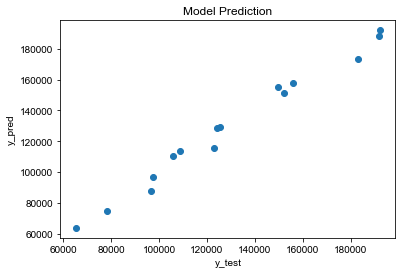

In [46]:
plt.scatter( y_test,y_pred)
sns.se
plt.xlabel('y_test')
plt.ylabel('y_pred')
plt.title('Model Prediction')

plt.show()


In [35]:
#finding the accuracy of the  model 
r2_score(y_test, y_pred)

0.9835549234318761

In [36]:
#saving our model 
joblib.dump(model, "profit_prediction.pk")


['profit_prediction.pk']

In [44]:
#testing our dump model

RnD = 180380
Administration = 149487
Marketing  = 164701
test_feature= [RnD,Administration,Marketing]

test_feature_arr = np.array(test_feature)
test_feature_arr = test_feature_arr.reshape(1, -1)
profit_model = joblib.load("profit_prediction.pk")
profit_prediction = profit_model.predict(test_feature_arr )

print(profit_prediction[0])
print(str(round(float(profit_prediction), 2)))

195982.04170903872
195982.04
